## Loading and Observing the dataset

In [1]:
from sklearn.datasets import load_digits

In [2]:
mnist = load_digits()

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [4]:
mnist.data.shape

(1797, 64)

In [5]:
X, y = mnist["data"], mnist["target"]
X.shape

(1797, 64)

In [6]:
y.shape

(1797,)

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

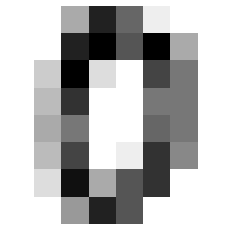

In [8]:
some_digit = X[0]
some_digit_image = some_digit.reshape(8,8)
## reshaped to (8,8) for matrix dimensions as vector shape was (64,)

plt.imshow(some_digit_image, cmap = 'binary') # to convert 2D numpy array to an image
plt.axis("off")
plt.show()

In [9]:
## The above digit looks like a 0, and the model also outputs a 0.

y[0]

0

In [10]:
## Since the label is a string and most ML algorithms expect numbers, so casting y to integer

import numpy as np
y = y.astype(np.uint8)

In [11]:
## Splitting the dataset into training and test sets

In [12]:
X_train, X_test, y_train, y_test = X[:1530], X[1530:], y[:1530], y[1530:]

## Training a Binary Classifier

In [13]:
y_train_5 = (y_train == 5) #True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

y_train

array([0, 1, 2, ..., 7, 2, 8], dtype=uint8)

In [14]:
y_train_5   # only True for 5

array([False, False, False, ..., False, False, False])

In [15]:
X_train

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  3., 15., ..., 12.,  9.,  0.],
       [ 0.,  0.,  1., ...,  5.,  0.,  0.]])

In [16]:
## Using StochasticGradientDescent (SGD) as classifier which deals with one instance at a time.
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [17]:
## Using sgd to detect images of number '5'

sgd_clf.predict([some_digit]) # == X[0]

array([0], dtype=uint8)

## Performnace Measures

In [18]:
## Evaluating SGDclassifier for identifying 5s

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.98627451, 0.98431373, 0.98823529])

In [19]:
## Evaluating SGDclassifier for identifying not-5s

from sklearn.base import BaseEstimator ##

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [20]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.89803922, 0.9       , 0.9       ])

In [21]:
## This shows us that accuracy is not a good performance measure for classifiers, especially when dealing with skewed datasets (i.e., when some classes are much more frequent than others).

## Confusion Matrix

In [22]:
## To count the number of times instances of class A are classified as class B.
## Using cross-val_predict func for this.

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [23]:
## cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold.

In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[1364,   12],
       [   9,  145]], dtype=int64)

In [25]:
## Each row in a confusion matrix represents an actual class, while each column represents a predicted class. [0,0] = TN [0,1] = FP [1,0] = FN [1,1] = TP

## Precision and Recall

In [26]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == TP/(TP + FP) == 145/(145+12)

0.9235668789808917

In [27]:
recall_score(y_train_5, y_train_pred) # == TP/(TP+FN) = 145(145+9)

0.9415584415584416

### F1-score = Harmonic Mean of precison and recall

In [28]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.9324758842443731

## Precision-Recall Tradeoff

In [29]:
## Use of decision_func to set manual threshold value to decide precision and recall

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([[ 1999.11604034, -3566.69081462, -2780.08554103, -1666.26642197,
        -2374.13974415, -2370.03305487, -1451.27272828, -1968.23216723,
        -1922.1037255 ,  -831.57897615]])

In [30]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [31]:
y_some_digit_pred

array([[ True, False, False, False, False, False, False, False, False,
        False]])

In [32]:
threshold = 8000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([[False, False, False, False, False, False, False, False, False,
        False]])

In [33]:
## Hence, raising the threshold, decreases the recall. So how to decide correct value?
## Use cross_val_predict() with specifying to return decision scores instead of predictions

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

In [35]:
## using precision_recall_curve() function to compute precision and recall for all possible thresholds

In [36]:
from sklearn.metrics import precision_recall_curve

In [37]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [38]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")

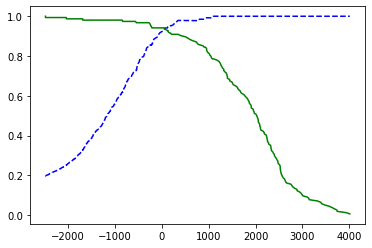

In [39]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [40]:
## If the aim is for 90% precision.
## Search for the lowest threshold that gives at least 90% precision (np.argmax() will give the first index of the maximum value, which in this case means the first True value)

In [41]:
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]

In [42]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [43]:
precision_score(y_train_5, y_train_pred_90)

0.9006211180124224

In [44]:
recall_score(y_train_5, y_train_pred_90)

0.9415584415584416

## ROC (Receiver Operating Characteristic) Curve

In [45]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

In [46]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # Dashed diagonal

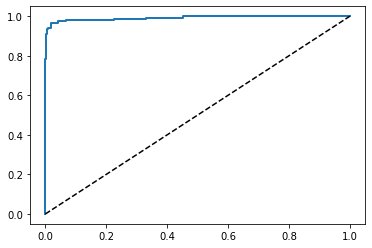

In [47]:
plot_roc_curve(fpr, tpr)
plt.show()

In [48]:
## One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9919208698278467

In [50]:
## As a rule of thumb, you should prefer the PR curve whenever the positive class is rare or when you care more about the false positives than the false negatives.

### RandomForest

In [51]:
## RandomForestClassifier and compare its ROC curve and ROC AUC score to those of the SGDClassifier

In [52]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [53]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

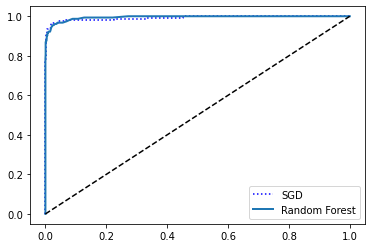

In [54]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [55]:
## RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner. As a result, its ROC AUC score is also significantly better

In [56]:
roc_auc_score(y_train_5, y_scores_forest)

0.994837284808215

In [57]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
svm_clf.predict

<bound method BaseSVC.predict of SVC()>